In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load data
df_reviews = pd.read_csv('tourism_review_combined.csv')
df_visits = pd.read_csv('tourism_visit_combined.csv')

In [19]:
print("Review Data:")
display(df_reviews.head())
print("Visit Data:")
display(df_visits.head())

Review Data:


,place_name,review_text,review_rating
0,taman impian ancol,ancol semenjak ganti scurity aman tentram tida...,5
1,taman impian ancol,lokasi makin oke luas rapih dan bersih hanya d...,4
2,taman impian ancol,seru seru wahana paling favorit naek kereta mi...,5
3,taman impian ancol,seru bareng sayang,5
4,taman impian ancol,bagaimana kalau ke dufan selalu happy utama to...,4


Visit Data:


,place_name,year,total_visitor
0,atlantis ancol,2020,163049
1,samudra ancol,2020,284358
2,dufan ancol,2020,685837
3,taman impian ancol,2020,4512892
4,seaworld ancol,2020,275266


In [20]:
print("Informasi Dataset Review:")
df_reviews.info()
print("\nInformasi Dataset Visit:")
df_visits.info()

Informasi Dataset Review:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   place_name     1643 non-null   object
 1   review_text    1643 non-null   object
 2   review_rating  1643 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 38.6+ KB

Informasi Dataset Visit:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   place_name     72 non-null     object
 1   year           72 non-null     int64 
 2   total_visitor  72 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


In [21]:
print("\nJumlah missing value:")
print("Review Dataset:\n", df_reviews.isnull().sum())
print("\nVisit Dataset:\n", df_visits.isnull().sum())


Jumlah missing value:
Review Dataset:
 place_name       0
review_text      0
review_rating    0
dtype: int64

Visit Dataset:
 place_name       0
year             0
total_visitor    0
dtype: int64


/tmp/ipython-input-22-1196105386.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='review_rating', palette='coolwarm')


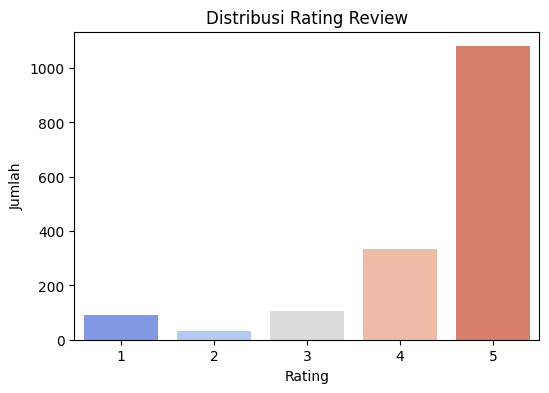

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(data=df_reviews, x='review_rating', palette='coolwarm')
plt.title('Distribusi Rating Review')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

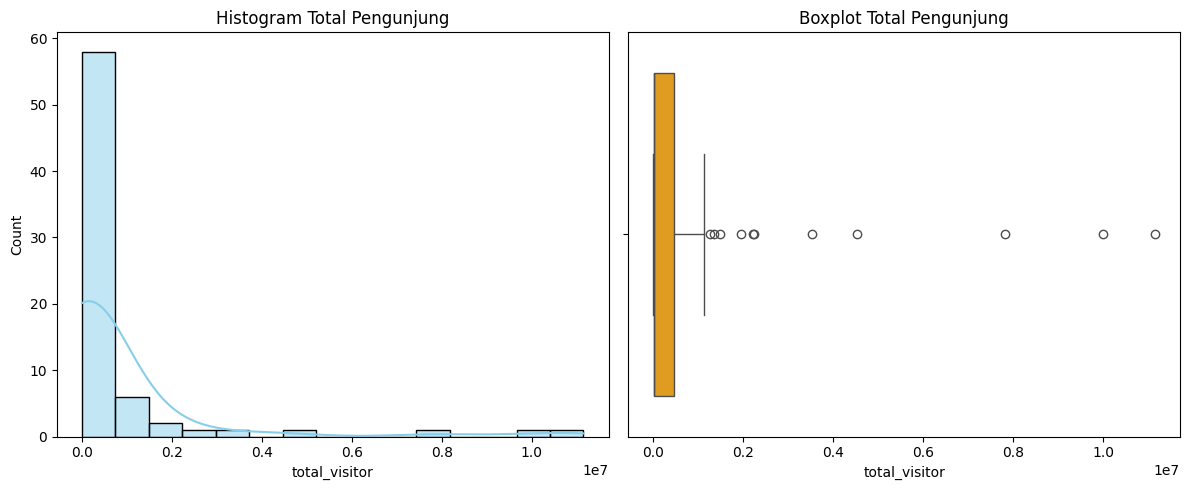

In [30]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_visits['total_visitor'], bins=15, kde=True, color='skyblue')
plt.title('Histogram Total Pengunjung')

plt.subplot(1,2,2)
sns.boxplot(x=df_visits['total_visitor'], color='orange')
plt.title('Boxplot Total Pengunjung')
plt.tight_layout()
plt.show()

In [26]:
mean_rating = df_reviews.groupby('place_name')['review_rating'].mean().reset_index()
print("\nRata-rata rating per tempat wisata:\n", mean_rating.head())


Rata-rata rating per tempat wisata:
                place_name  review_rating
0          atlantis ancol       4.117021
1  desa wisata duren sari       4.857143
2             dufan ancol       4.514286
3                goa lowo       4.517857
4              goa ngerit       4.455285


In [27]:
review_counts = df_reviews.groupby('place_name').size().reset_index(name='review_count')
print("\nJumlah review per tempat wisata:\n", review_counts.head())


Jumlah review per tempat wisata:
                place_name  review_count
0          atlantis ancol            94
1  desa wisata duren sari            21
2             dufan ancol            35
3                goa lowo           112
4              goa ngerit           123


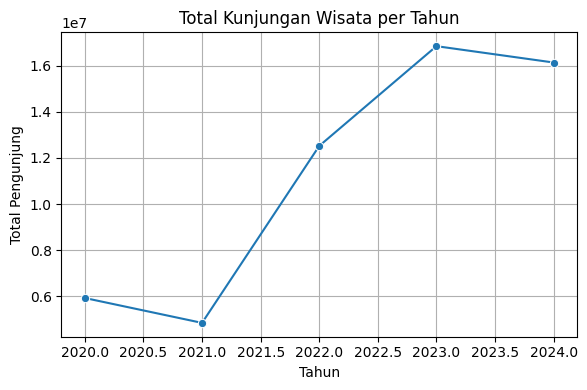

In [28]:
plt.figure(figsize=(6,4))
df_yearly = df_visits.groupby('year')['total_visitor'].sum().reset_index()
sns.lineplot(data=df_yearly, x='year', y='total_visitor', marker='o')
plt.title('Total Kunjungan Wisata per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Pengunjung')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
mean_visits = df_visits.groupby('place_name')['total_visitor'].mean().reset_index()
print("\nRata-rata kunjungan per tempat wisata:\n", mean_visits.head())


Rata-rata kunjungan per tempat wisata:
                    place_name  total_visitor
0      Desa Wisata Duren Sari    3202.666667
1  Desa Wisata Pandean Dongko    4446.000000
2                    Goa Lowo    9476.666667
3    Hutan Mangrove Cengkrong   11593.333333
4     Kolam Renang Banyu Biru   10559.000000
